In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [113]:
#read csv. . . . . 
file_path = "/Users/siddheshchavan/Downloads/beer-data.csv"
beer_data = pd.read_csv(file_path)

#shuffle the rows. . . . . 
beer_data = beer_data.sample(frac=1.0, random_state=42).reset_index(drop=True)

#print the shuffled DataFrame. . . . 
print(beer_data)



     Malt Quantity  Hop Quantity  Fermentation Time  Yeast Quantity   Recipe
0              6.1           2.8                4.7             1.2  pilsner
1              5.7           3.8                1.7             0.3    stout
2              7.7           2.6                6.9             2.3    lager
3              6.0           2.9                4.5             1.5  pilsner
4              6.8           2.8                4.8             1.4  pilsner
..             ...           ...                ...             ...      ...
145            6.1           2.8                4.0             1.3  pilsner
146            4.9           2.5                4.5             1.7    lager
147            5.8           4.0                1.2             0.2    stout
148            5.8           2.6                4.0             1.2  pilsner
149            7.1           3.0                5.9             2.1    lager

[150 rows x 5 columns]


In [114]:
#checking for missing values. . . . . 
missing_values = beer_data.isnull().sum()

print("Missing Values in Beer Data:")
print(missing_values)

Missing Values in Beer Data:
Malt Quantity        0
Hop Quantity         0
Fermentation Time    0
Yeast Quantity       0
Recipe               0
dtype: int64


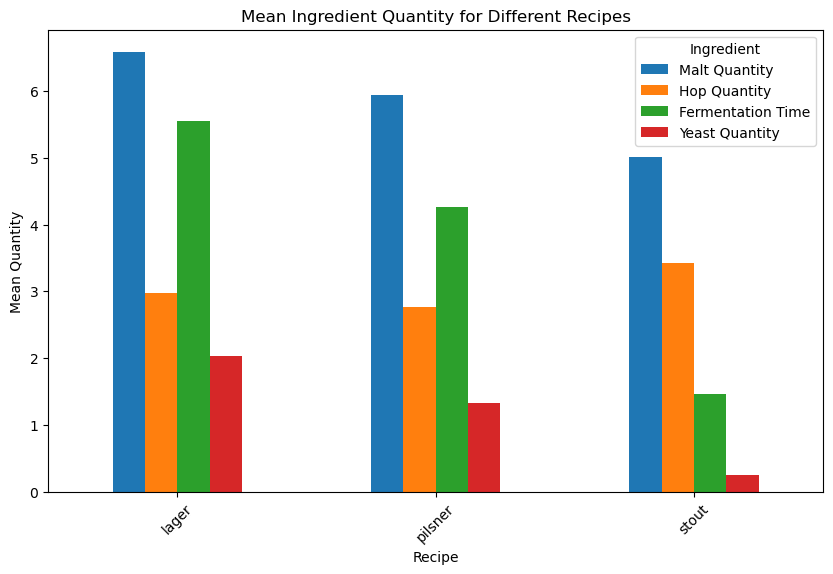

In [115]:
#recipe Comparison Over Batch Number. . . .
recipe_comparison = beer_data.groupby(['Recipe']).mean()

#bar....
recipe_comparison.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Recipe')
plt.ylabel('Mean Quantity')
plt.title('Mean Ingredient Quantity for Different Recipes')
plt.xticks(rotation=45)
plt.legend(title='Ingredient')
plt.show()

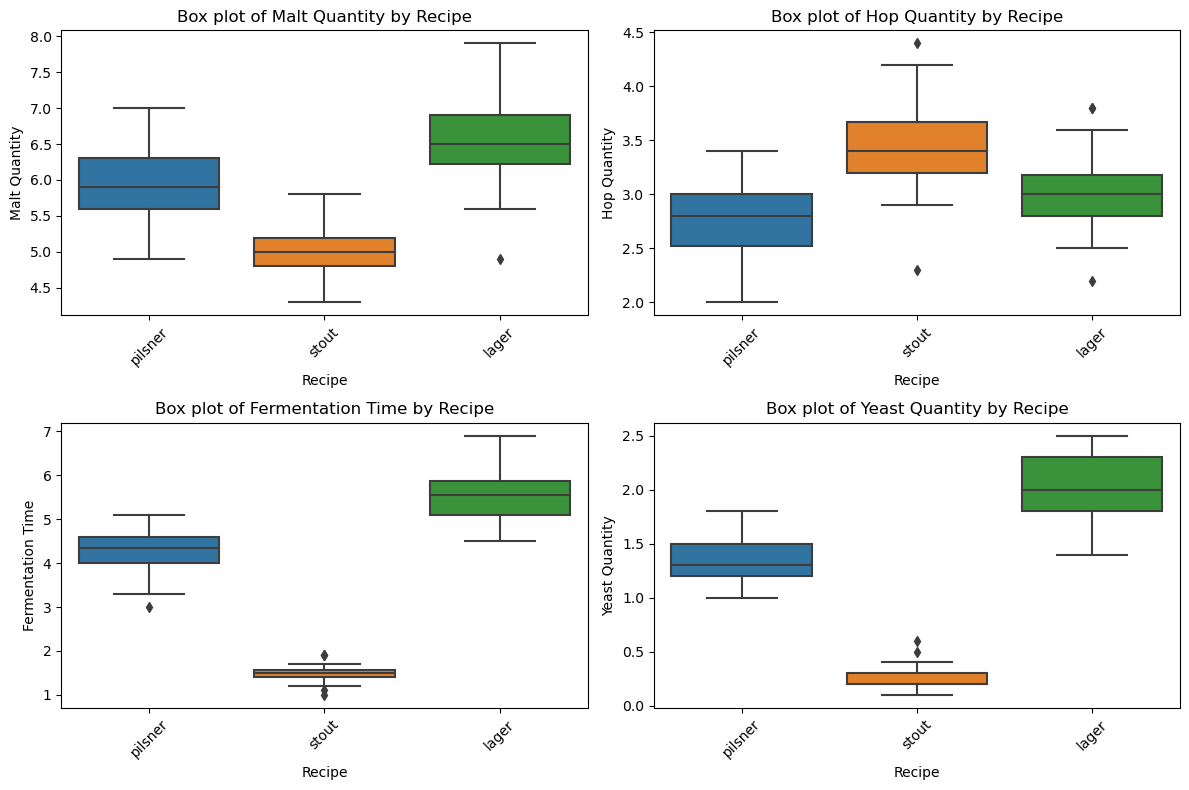

In [116]:
#each numerical variable grouped by recipe type. . . . . . 
plt.figure(figsize=(12, 8))

numerical_variables = ['Malt Quantity', 'Hop Quantity', 'Fermentation Time', 'Yeast Quantity']

for i, col in enumerate(numerical_variables):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Recipe', y=col, data=beer_data)
    plt.title(f'Box plot of {col} by Recipe')
    plt.xlabel('Recipe')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


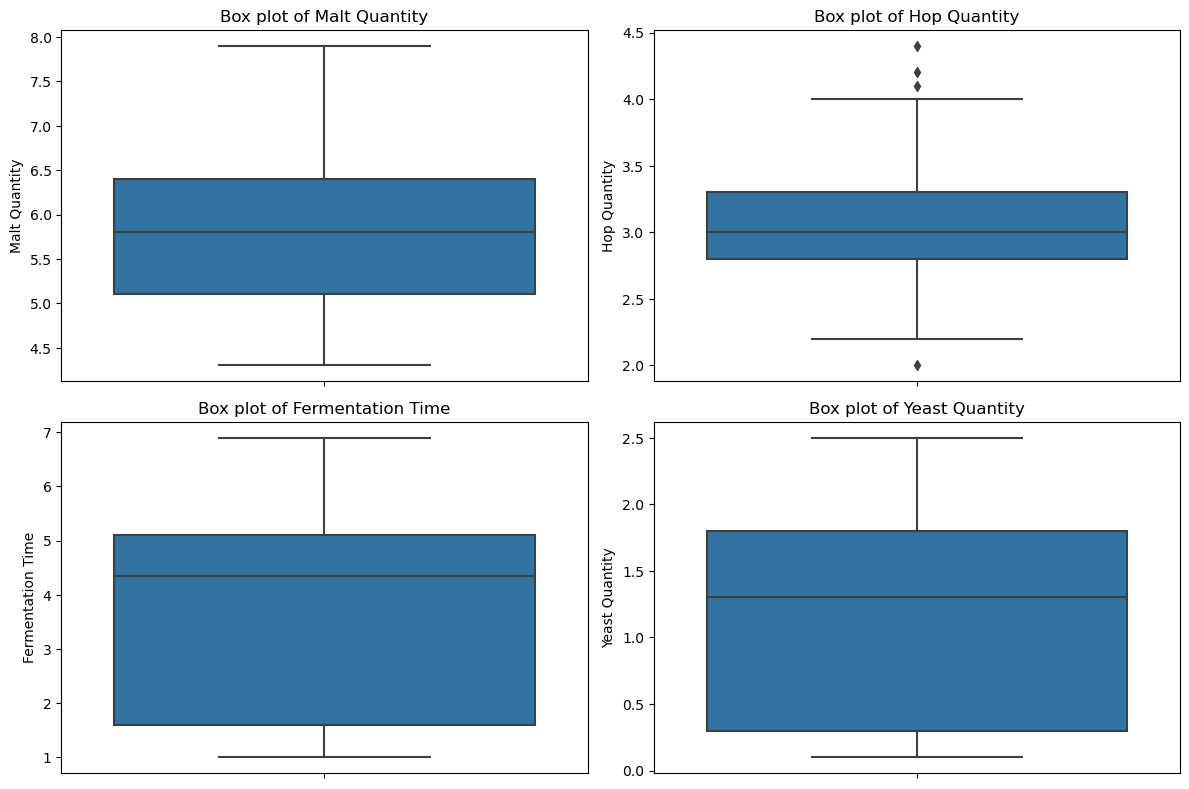

In [117]:
plt.figure(figsize=(12, 8))

numerical_variables = ['Malt Quantity', 'Hop Quantity', 'Fermentation Time', 'Yeast Quantity']

for i, col in enumerate(numerical_variables):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=beer_data[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


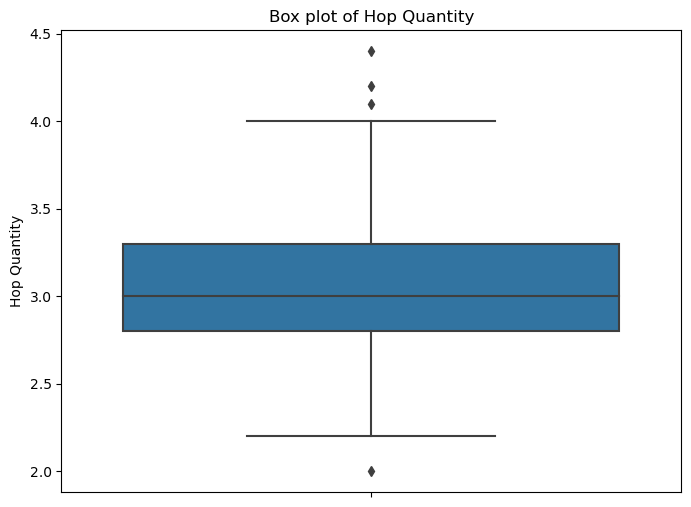

In [118]:
plt.figure(figsize=(8, 6))

sns.boxplot(y=beer_data['Hop Quantity'])
plt.title('Box plot of Hop Quantity')
plt.ylabel('Hop Quantity')

plt.show()

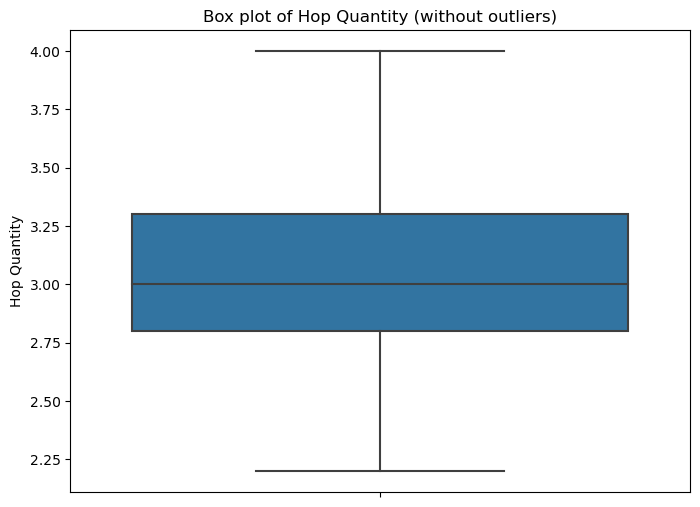

In [119]:
#calculate Q1 and Q3 
Q1 = beer_data['Hop Quantity'].quantile(0.25)
Q3 = beer_data['Hop Quantity'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filter out the outliers
filtered_beer_data = beer_data[(beer_data['Hop Quantity'] >= lower_bound) & (beer_data['Hop Quantity'] <= upper_bound)]

#create a box plot for the filtered data
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_beer_data['Hop Quantity'])
plt.title('Box plot of Hop Quantity (without outliers)')
plt.ylabel('Hop Quantity')
plt.show()

In [120]:
print(filtered_beer_data)

     Malt Quantity  Hop Quantity  Fermentation Time  Yeast Quantity   Recipe
0              6.1           2.8                4.7             1.2  pilsner
1              5.7           3.8                1.7             0.3    stout
2              7.7           2.6                6.9             2.3    lager
3              6.0           2.9                4.5             1.5  pilsner
4              6.8           2.8                4.8             1.4  pilsner
..             ...           ...                ...             ...      ...
145            6.1           2.8                4.0             1.3  pilsner
146            4.9           2.5                4.5             1.7    lager
147            5.8           4.0                1.2             0.2    stout
148            5.8           2.6                4.0             1.2  pilsner
149            7.1           3.0                5.9             2.1    lager

[146 rows x 5 columns]


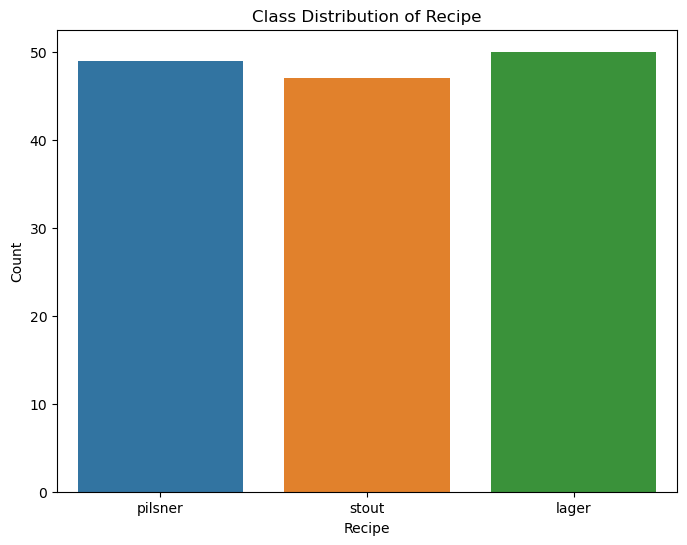

In [121]:
#plotting class distribution. . . . .
plt.figure(figsize=(8, 6))
sns.countplot(x='Recipe', data=filtered_beer_data)
plt.title('Class Distribution of Recipe')
plt.xlabel('Recipe')
plt.ylabel('Count')
plt.show()

In [122]:
from sklearn.preprocessing import LabelEncoder
#Initialize the LabelEncoder. . . . . 
label_encoder = LabelEncoder()

#encode the 'Recipe' column
filtered_beer_data['Recipe_encoded'] = label_encoder.fit_transform(filtered_beer_data['Recipe'])

#display the unique integer labels assigned to each beer type
print(label_encoder.classes_)

['lager' 'pilsner' 'stout']


/var/folders/qn/vqm7ttt96r9_n7b2bw3s1fnr0000gn/T/ipykernel_54574/665632500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_beer_data['Recipe_encoded'] = label_encoder.fit_transform(filtered_beer_data['Recipe'])


In [125]:
print(filtered_beer_data.columns)

Index(['Malt Quantity', 'Hop Quantity', 'Fermentation Time', 'Yeast Quantity',
       'Recipe', 'Recipe_encoded'],
      dtype='object')


In [126]:
filtered_beer_data

,Malt Quantity,Hop Quantity,Fermentation Time,Yeast Quantity,Recipe,Recipe_encoded
0,6.1,2.8,4.7,1.2,pilsner,1
1,5.7,3.8,1.7,0.3,stout,2
2,7.7,2.6,6.9,2.3,lager,0
3,6.0,2.9,4.5,1.5,pilsner,1
4,6.8,2.8,4.8,1.4,pilsner,1
...,...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,pilsner,1
146,4.9,2.5,4.5,1.7,lager,0
147,5.8,4.0,1.2,0.2,stout,2
148,5.8,2.6,4.0,1.2,pilsner,1


In [127]:
#drop the original 'Recipe' column. . . . . 
filtered_beer_data.drop(columns=['Recipe'], inplace=True)

#display the modified DataFrame. . . . . .
print(filtered_beer_data.head())

   Malt Quantity  Hop Quantity  Fermentation Time  Yeast Quantity  \
0            6.1           2.8                4.7             1.2   
1            5.7           3.8                1.7             0.3   
2            7.7           2.6                6.9             2.3   
3            6.0           2.9                4.5             1.5   
4            6.8           2.8                4.8             1.4   

   Recipe_encoded  
0               1  
1               2  
2               0  
3               1  
4               1  


/var/folders/qn/vqm7ttt96r9_n7b2bw3s1fnr0000gn/T/ipykernel_54574/3297976973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_beer_data.drop(columns=['Recipe'], inplace=True)


In [128]:
filtered_beer_data

,Malt Quantity,Hop Quantity,Fermentation Time,Yeast Quantity,Recipe_encoded
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,2
2,7.7,2.6,6.9,2.3,0
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,1
146,4.9,2.5,4.5,1.7,0
147,5.8,4.0,1.2,0.2,2
148,5.8,2.6,4.0,1.2,1


In [146]:
from scipy.stats import pointbiserialr

#point biserial correlation coefficient and p-value for Malt Quantity
malt_corr, malt_p_value = pointbiserialr(filtered_beer_data['Recipe_encoded'], filtered_beer_data['Malt Quantity'])
print(f"Pearson correlation coefficient between Recipe and Malt Quantity: {malt_corr}")
print(f"P-value: {malt_p_value}")

#Hop Quantity
hop_corr, hop_p_value = pointbiserialr(filtered_beer_data['Recipe_encoded'], filtered_beer_data['Hop Quantity'])
print(f"Pearson correlation coefficient between Recipe and Hop Quantity: {hop_corr}")
print(f"P-value: {hop_p_value}")

#Fermentation Time
fermentation_corr, fermentation_p_value = pointbiserialr(filtered_beer_data['Recipe_encoded'], filtered_beer_data['Fermentation Time'])
print(f"Pearson correlation coefficient between Recipe and Fermentation Time: {fermentation_corr}")
print(f"P-value: {fermentation_p_value}")

#Yeast Quantity
yeast_corr, yeast_p_value = pointbiserialr(filtered_beer_data['Recipe_encoded'], filtered_beer_data['Yeast Quantity'])
print(f"Pearson correlation coefficient between Recipe and Yeast Quantity: {yeast_corr}")
print(f"P-value: {yeast_p_value}")


Pearson correlation coefficient between Recipe and Malt Quantity: -0.7880526632990137
P-value: 3.832199237109662e-32
Pearson correlation coefficient between Recipe and Hop Quantity: 0.4053795305465603
P-value: 3.859638164029227e-07
Pearson correlation coefficient between Recipe and Fermentation Time: -0.9474599501263842
P-value: 3.6488390646941266e-73
Pearson correlation coefficient between Recipe and Yeast Quantity: -0.9556381216387442
P-value: 2.5056220568209276e-78


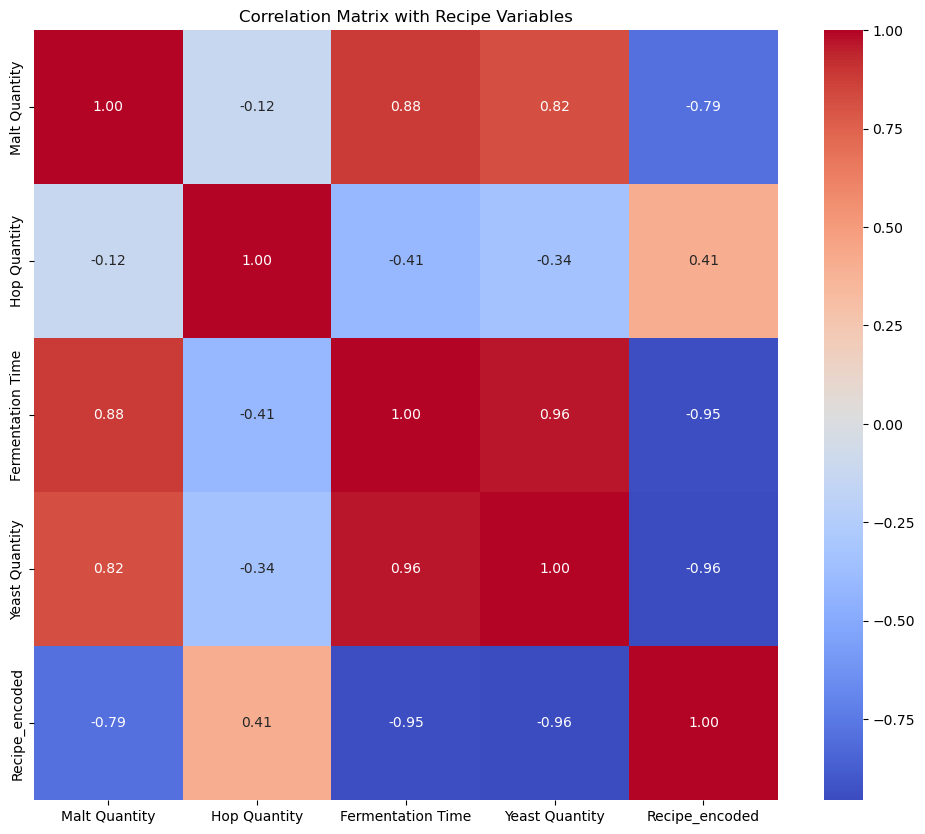

In [129]:
#calculate the correlation matrix. . . . . 
correlation_matrix = filtered_beer_data.corr()

#visualize the correlation matrix using a heatmap. . . . . . 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix with Recipe Variables')
plt.show()


In [130]:
#split the data. . . . .
X = filtered_beer_data.drop('Recipe_encoded', axis=1)  # Features
y = filtered_beer_data['Recipe_encoded']  # Target variable

#split the data into training and testing sets. . . . . 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
#save train and test data to CSV files. . . . . . . .
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False, header=True)
y_test.to_csv('y_test.csv', index=False, header=True)

In [133]:
#load train and test data from CSV files. . . . . . 
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')['Recipe_encoded']
y_test = pd.read_csv('y_test.csv')['Recipe_encoded']


In [134]:
#logistic Regression. . . . . .
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [135]:
#logistic Regression. . . . . 
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.9666666666666667


In [136]:
#define hyperparameters and values to tune. . . . . .
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

#perform grid search with cross-validation. . . .
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

#best hyperparameters. . . . 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#train logistic regression with best hyperparameters. . . .
best_logistic_model = grid_search.best_estimator_
best_logistic_model.fit(X_train, y_train)

/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchava

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddheshchava

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [137]:
#logistic regression model with specified hyperparameters. . . . . .
logistic_model_tuned = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=100)
logistic_model_tuned.fit(X_train, y_train)

/Users/siddheshchavan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, solver='saga')

In [138]:
#predict on the test data . . . .
y_pred = logistic_model_tuned.predict(X_test)

#accuracy. . . . .
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Tuned Logistic Regression Model:", accuracy)

Accuracy of Tuned Logistic Regression Model: 1.0


In [140]:
#Load train and test. . . . 
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')['Recipe_encoded']
y_test = pd.read_csv('y_test.csv')['Recipe_encoded']

#decision Tree model. . . .
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

#Predict on the test data. . . .
y_pred = tree_model.predict(X_test)

#calculate accuracy. . . . 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier:", accuracy)

Accuracy of Decision Tree Classifier: 0.9666666666666667


In [141]:
#classification report for the Decision Tree model . . . . 
report = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:\n", report)

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



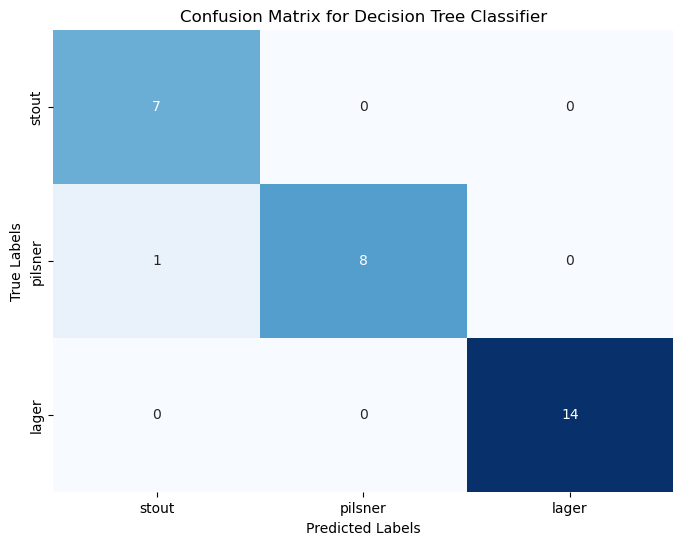

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#class names
class_names = ['stout', 'pilsner', 'lager']

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [143]:
#define the Decision Tree classifier. . . .
tree_model = DecisionTreeClassifier(random_state=42)

#5-fold cross-validation
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5)

#cross-validation scores
print("Cross-validation scores:", cv_scores)

#mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.95833333 0.91304348 0.91304348 0.95652174 1.        ]
Mean Accuracy: 0.9481884057971014


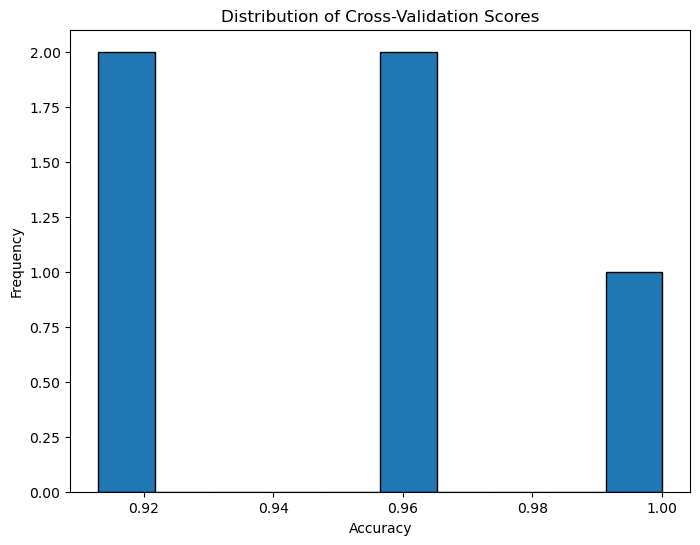

In [144]:
#perform 5-fold cross-validation
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5)

# Plot the distribution of cross-validation scores
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Cross-Validation Scores')
plt.show()
